In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# TODO
# Implement the linear regression using gradient descent by only numpy

class LinearRegression:
    
    def __init__(self):
        
        print("Don't cheat.")
        self.epoch = []
        self.train_loss = []
        self.weights = None

    def fit(self, X, y, lr=0.001, epochs=100, batch_size=1):
        m, n = X.shape
        one = np.ones((X.shape[0], 1))
        X = np.hstack((X, one))
        y = y.reshape(y.shape[0], 1)
        self.weights = np.zeros((n + 1, 1))
        
        for epoch in range(epochs):
            for batch in range(len(X)//batch_size):
                
                X_batch = X[batch * batch_size: (batch + 1) * batch_size]
                y_batch = y[batch * batch_size: (batch + 1) * batch_size]
                
                y_pred = np.dot(X_batch, self.weights)
                error = y_pred - y_batch
                
                t = np.dot(X_batch.T, error)
                
                self.weights -= lr * (1/batch_size) * t
                
            self.epoch.append(epoch)
            self.train_loss.append(self.get_loss(X, y))

    def get_loss(self, X, y):
        m = y.size
        y_pred = np.dot(X, self.weights)
        error = y_pred - y
        
        return (1/2) * np.mean(error ** 2)

    def predict(self, X):
        m, n = X.shape
        one = np.ones((X.shape[0], 1))
        X = np.hstack((X, one))
        
        return np.dot(X, self.weights)
                
    def evaluate(self, X, y):
        m, n = X.shape
        one = np.ones((X.shape[0], 1))
        X = np.hstack((X, one))
        y = y.reshape(y.shape[0], 1)
        
        y_pred = np.dot(X, self.weights)
        error = y_pred - y
        
        return (1/2) * np.mean(error ** 2)
        
    def plot_curve(self):
        # self.epoch and self.train_loss may be helpful here. 
        plt.plot(self.epoch, self.train_loss, label='Training Loss')
        plt.title('Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

# Load data & data pre-processing

In [3]:
df_train = pd.DataFrame(pd.read_csv("./regression_train.csv"))
df_val   = pd.DataFrame(pd.read_csv("./regression_val.csv"))
df_test  = pd.DataFrame(pd.read_csv("./regression_test.csv"))

In [4]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df_test.head()

,age,sex,bmi,children,smoker,region,charges
0,33,male,30.25,0,no,southeast,NaN
1,19,female,32.49,0,yes,northwest,NaN
2,50,male,37.07,1,no,southeast,NaN
3,41,female,32.60,3,no,southwest,NaN
4,52,female,24.86,0,no,southeast,NaN


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       938 non-null    int64  
 1   sex       938 non-null    object 
 2   bmi       938 non-null    float64
 3   children  938 non-null    int64  
 4   smoker    938 non-null    object 
 5   region    938 non-null    object 
 6   charges   938 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 51.4+ KB


In [7]:
# TODO
# You may do the labelEncoder here

#### For multiple features, please use the following settings.####
# sex.female -> 0
# sex.male -> 1

# smoker.no -> 0
# smoker.yes -> 1

# region.northeast -> 0
# region.northwest -> 1
# region.southeast -> 2
# region.southwest -> 3
##################################################################


# You may try different label encoding for training your own model


sex_map = {'female': 0, 'male': 1}
smoker_map = {'no': 0, 'yes': 1}
region_map = {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}


#df_train['sex_encoded'] = df_train['sex'].map(sex_map)
#df_train['smoker_encoded'] = df_train['smoker'].map(smoker_map)

df_train['sex'] = df_train['sex'].map(sex_map)
df_train['smoker'] = df_train['smoker'].map(smoker_map)
df_train['region'] = df_train['region'].map(region_map)

df_val['sex'] = df_val['sex'].map(sex_map)
df_val['smoker'] = df_val['smoker'].map(smoker_map)
df_val['region'] = df_val['region'].map(region_map)

df_test['sex'] = df_test['sex'].map(sex_map)
df_test['smoker'] = df_test['smoker'].map(smoker_map)
df_test['region'] = df_test['region'].map(region_map)

#print(df_train)

# Single feature (using bmi)

In [8]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']
x_train = x_train[['bmi']]

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']
x_val = x_val[['bmi']]

x_test = df_test.drop(['charges'], axis=1)
x_test = x_test[['bmi']]

In [9]:
# TODO
# You may convert data to NumPy here 

x_train = np.array(x_train)
y_train = np.array(y_train)

x_val = np.array(x_val)
y_val = np.array(y_val)

x_test = np.array(x_test)

In [10]:
batch_size = x_train.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 9
lr = 0.001
epochs = 250000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

Don't cheat.


In [11]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])
#Intercepts:  1382.5371644361621
#Weights:  [380.13464539]])

Intercepts:  [1382.38621394]
Weights:  [[380.13935218]]


In [12]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  69781032.74212956


In [13]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  68460131.75953527


In [14]:
test_pred = linear_reg.predict(x_test)
#print("test_pred", test_pred)

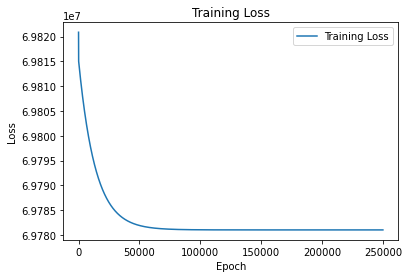

In [15]:
linear_reg.plot_curve()

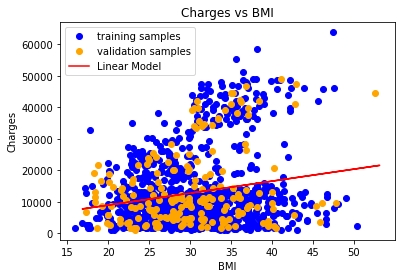

In [16]:
# Use matplotlib to plot the predicted line with the training and validation samples

# TODO

plt.plot(x_train, y_train, 'o', label='training samples', color = 'blue')
plt.plot(x_val, y_val, 'o', label='validation samples', color='orange')
plt.plot(x_test, test_pred, label='Linear Model', color='red')
plt.title('Charges vs BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.show()

# Multiple features

In [17]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['charges'], axis=1)

In [18]:
# TODO
# You may convert data to NumPy here 

x_train = np.array(x_train)
y_train = np.array(y_train)

x_val = np.array(x_val)
y_val = np.array(y_val)

x_test = np.array(x_test)

#print("X.ndim", x_train.ndim)
#print("X.shape[1]", x_train.shape[1])

In [19]:
batch_size = x_train.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 10
lr = 0.0007
epochs = 650000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

Don't cheat.


In [20]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])
#Intercepts:  -11857.057377634748
#Weights:  [  259.8508643   
#-383.54524271   
#333.33251548   
#442.55747876
# 24032.22099619  
#-416.0143858 ]

Intercepts:  [-11857.0282986]
Weights:  [[  259.85072835]
 [ -383.5471172 ]
 [  333.3318584 ]
 [  442.55699937]
 [24032.21979141]
 [ -416.01494403]]


In [21]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  17348585.126771744


In [22]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  20979281.826353323


In [23]:
test_pred = linear_reg.predict(x_test)

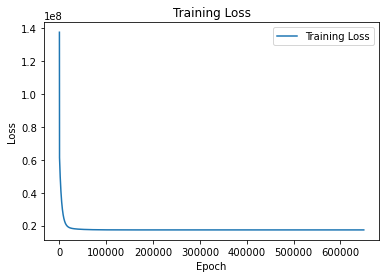

In [24]:
linear_reg.plot_curve()

# Train your own model and predict for testing data.

In [25]:
##age sex bmi children smoker region charges

x_train_my = df_train.drop(['charges'], axis=1)
y_train_my = df_train['charges']
#x_train_my = x_train_my[['region']]
x_train_my = df_train.drop(['charges','sex'], axis=1)

x_val_my = df_val.drop(['charges'], axis=1)
y_val_my = df_val['charges']
#x_val_my = x_val_my[['region']]
x_val_my = df_val.drop(['charges','sex'], axis=1)

x_test_my = df_test.drop(['charges'], axis=1)
#x_test_my = x_test_my[['region']]
x_test_my = df_test.drop(['charges','sex'], axis=1)


x_train_my = np.array(x_train_my)
y_train_my = np.array(y_train_my)

x_val_my = np.array(x_val_my)
y_val_my = np.array(y_val_my)

x_test_my = np.array(x_test_my)

#print('x_test_my:', x_test_my)
#print("X.ndim", x_train_my.ndim)
#print("X.shape[1]", x_train_my.shape[1])

In [26]:
batch_size_my = x_train_my.shape[0]
#print("batch_size_my", batch_size_my)

lr_my = 0.0007
epochs_my = 650000

linear_reg = LinearRegression()
linear_reg.fit(x_train_my, y_train_my, lr=lr_my, epochs=epochs_my, batch_size=batch_size_my)

Don't cheat.


In [27]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])

print('training loss: ', linear_reg.evaluate(x_train_my, y_train_my))
print('validation loss: ', linear_reg.evaluate(x_val_my, y_val_my))

test_pred_my = linear_reg.predict(x_test_my)
error = test_pred_my - test_pred
print("test MSE: ", (1/2) * np.mean(error ** 2))

Intercepts:  [-12048.36316374]
Weights:  [[  260.60682788]
 [  332.64107964]
 [  438.35131252]
 [23998.9619874 ]
 [ -415.0599551 ]]
training loss:  17366813.45282496
validation loss:  20905056.738847155
test MSE:  18387.87397378454


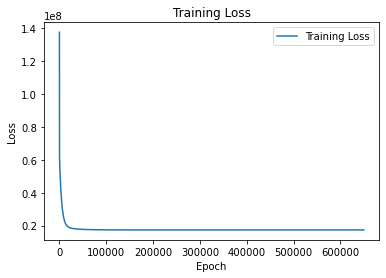

In [28]:
linear_reg.plot_curve()

In [29]:
test_pred_my = linear_reg.predict(x_test_my)
print("test_pred shape: ", test_pred_my.shape)
assert test_pred_my.shape == (200, 1)

test_pred shape:  (200, 1)


# Output the csv file

In [30]:
df_test = pd.DataFrame(pd.read_csv("./regression_test.csv"))
df_test["charges"] = test_pred_my
df_test.to_csv("sample_output.csv")